# Environment Setup

## Import Libraries

In [2]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [3]:
df = pd.read_pickle('../data/processed/df_filtered.pkl')

In [4]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2002068522,29093,2018-03-26,0,i made it and it was amazing,petit gateau,27,30475,2002-05-21,"['30-minutes-or-less', 'time-to-make', 'course...","[425.4, 49.0, 90.0, 1.0, 15.0, 94.0, 11.0]",19,['break the chocolate and butter into small pi...,this is a terribly easy to make recipe of a de...,"['dark chocolate', 'unsalted butter', 'eggs', ...",7
1,2002097693,79222,2018-04-05,0,Do you have cook the potatoes beforehand?,potato crab chowder,45,115419,2003-12-18,"['60-minutes-or-less', 'time-to-make', 'course...","[274.2, 12.0, 15.0, 18.0, 32.0, 22.0, 12.0]",8,['saute onion& garlic in melted butter in larg...,soup for the soul!,"['butter', 'onion', 'garlic', 'potatoes', 'flo...",13
2,422608,441096,2016-02-26,5,"I didn&#039;t follow the instructions exactly,...",pumpkin chili,620,31807,2010-11-03,"['course', 'main-ingredient', 'preparation', '...","[322.9, 19.0, 18.0, 19.0, 42.0, 23.0, 11.0]",3,"['combine all ingredients in slow cooker', 'co...",add some fall flavor and some additional nutri...,"['ground beef', 'pumpkin puree', 'kidney beans...",7
3,2001891832,183729,2018-04-30,0,There is no cooking temp?????? Love this recip...,spaghetti corn,5,299289,2006-08-29,"['15-minutes-or-less', 'time-to-make', 'main-i...","[412.5, 24.0, 16.0, 20.0, 24.0, 46.0, 19.0]",5,"['mix all ingredients together', 'pour into 9x...",my mom found this in a news paper and decided ...,"['cream-style corn', 'whole kernel corn', 'spa...",5
4,2001338551,195977,2017-04-04,0,Have made this cake often. Have added 1 1/2 c ...,st louis style gooey butter cake,50,385857,2006-11-17,"['60-minutes-or-less', 'time-to-make', 'course...","[588.7, 37.0, 279.0, 21.0, 11.0, 57.0, 29.0]",28,"['preheat oven to 350', 'lightly grease one de...",what is gooey butter cake you ask? it is a sup...,"['butter', 'yellow cake mix', 'eggs', 'cream c...",6


# Exploratory Data Analysis

## Data Shape Details

In [5]:
df.shape

(65604, 16)

## Data Information Details

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65604 entries, 0 to 65603
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         65604 non-null  int64         
 1   recipe_id       65604 non-null  int64         
 2   date            65604 non-null  datetime64[ns]
 3   rating          65604 non-null  int64         
 4   review          65440 non-null  object        
 5   name            65604 non-null  object        
 6   minutes         65604 non-null  int64         
 7   contributor_id  65604 non-null  int64         
 8   submitted       65604 non-null  datetime64[ns]
 9   tags            65604 non-null  object        
 10  nutrition       65604 non-null  object        
 11  n_steps         65604 non-null  int64         
 12  steps           65604 non-null  object        
 13  description     65604 non-null  object        
 14  ingredients     65604 non-null  object        
 15  n_

## Missing Values Identification

In [7]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,user_id,0.000000
1,recipe_id,0.000000
2,date,0.000000
3,rating,0.000000
4,name,0.000000
5,minutes,0.000000
6,contributor_id,0.000000
7,submitted,0.000000
8,tags,0.000000
9,nutrition,0.000000


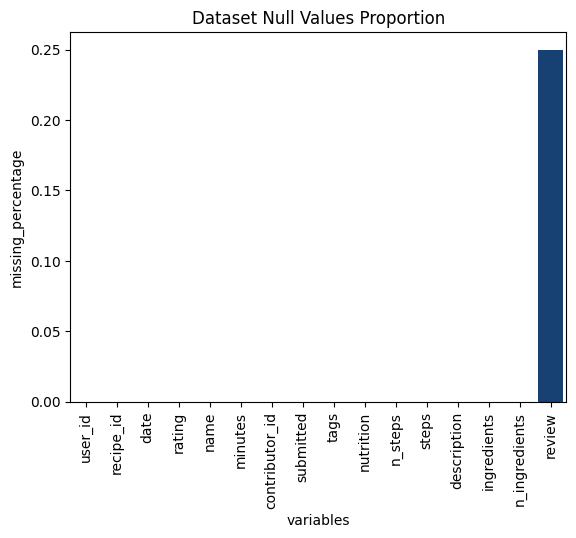

In [8]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            palette='Blues')
plt.title("Dataset Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

## Data Visualization

### Ratings Distribution

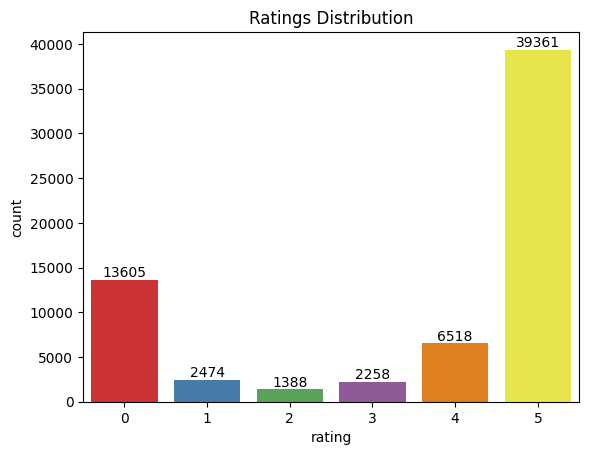

In [9]:
plt.title("Ratings Distribution")
ratings_distribution = sns.countplot(data=df, x="rating", palette='Set1')
ratings_distribution.bar_label(ratings_distribution.containers[0])
plt.show()

### Top 10 most rated recipes

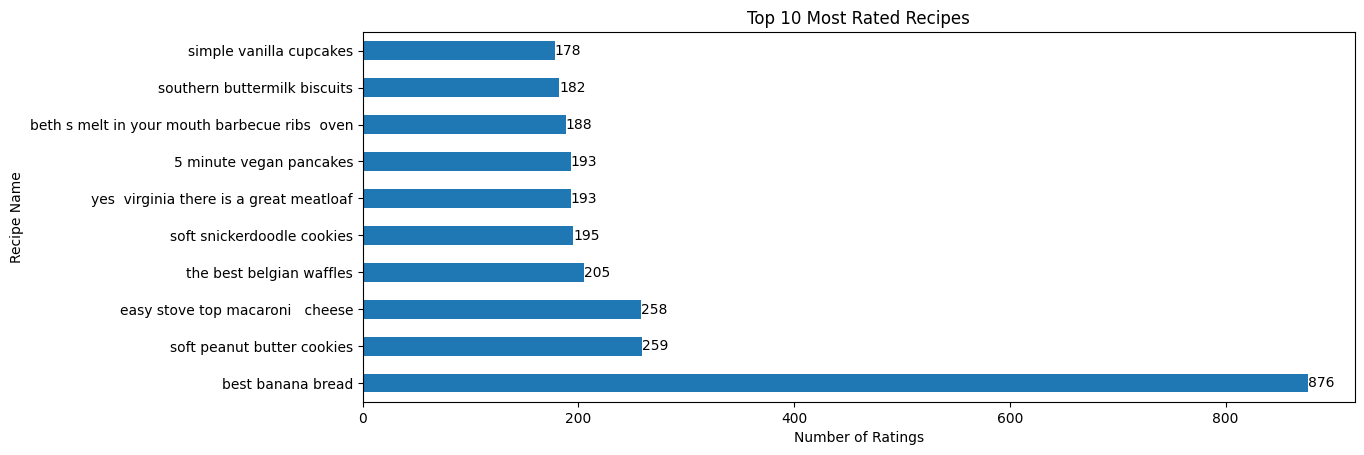

In [10]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Most Rated Recipes")
ratings_per_recipe = df.groupby(
    "name")["rating"].count().sort_values(ascending=False)
bars = ratings_per_recipe.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("Recipe Name")
plt.show()

### Top 10 users with most ratings

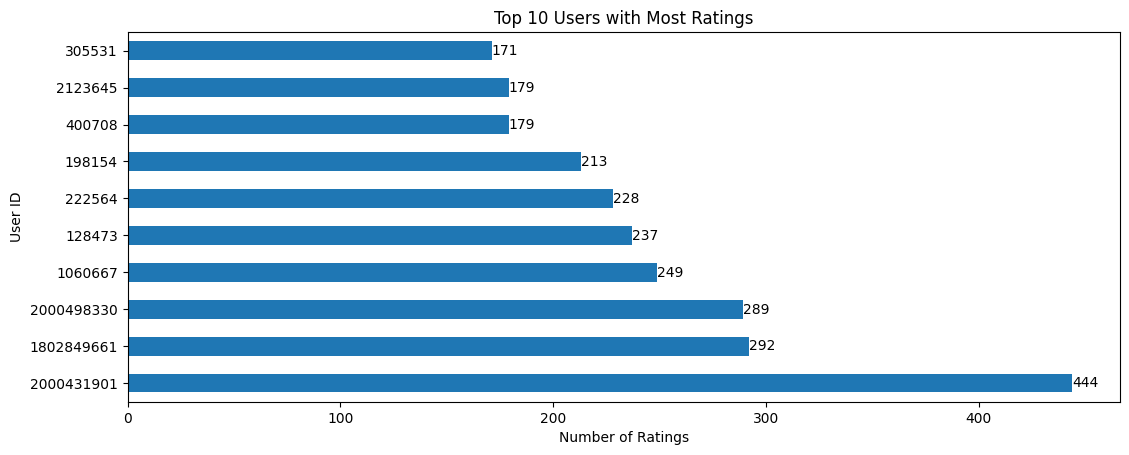

In [11]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Users with Most Ratings")
ratings_per_user = df.groupby(
    "user_id")["rating"].count().sort_values(ascending=False)
bars = ratings_per_user.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.show()

### Distribution of no of ingrediants per recipe

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


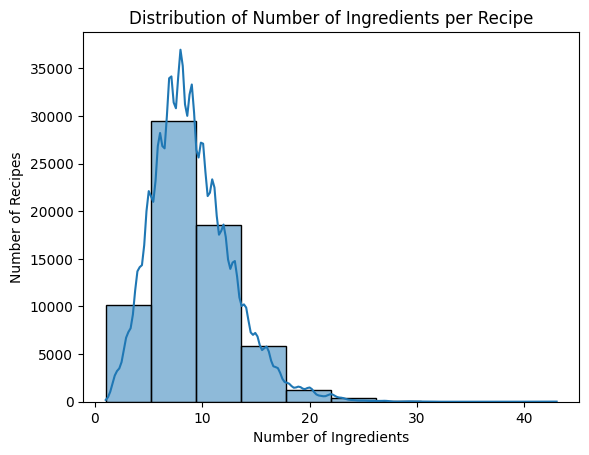

In [12]:
sns.histplot(df["n_ingredients"], bins=10, kde=True)
plt.title("Distribution of Number of Ingredients per Recipe")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.show()

### Distribution of preparation time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


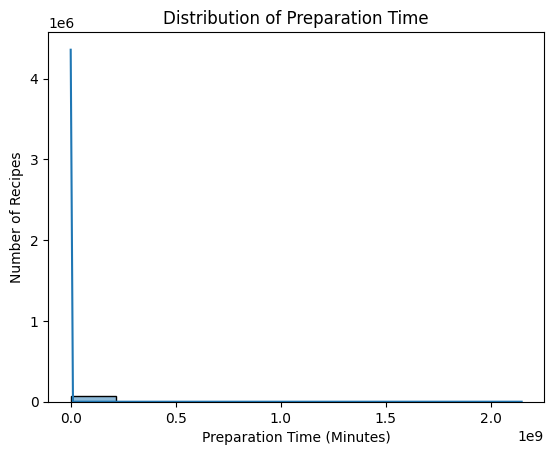

In [13]:
sns.histplot(df["minutes"], bins=10, kde=True)
plt.title("Distribution of Preparation Time")
plt.xlabel("Preparation Time (Minutes)")
plt.ylabel("Number of Recipes")
plt.show()

### Most common words in reviews

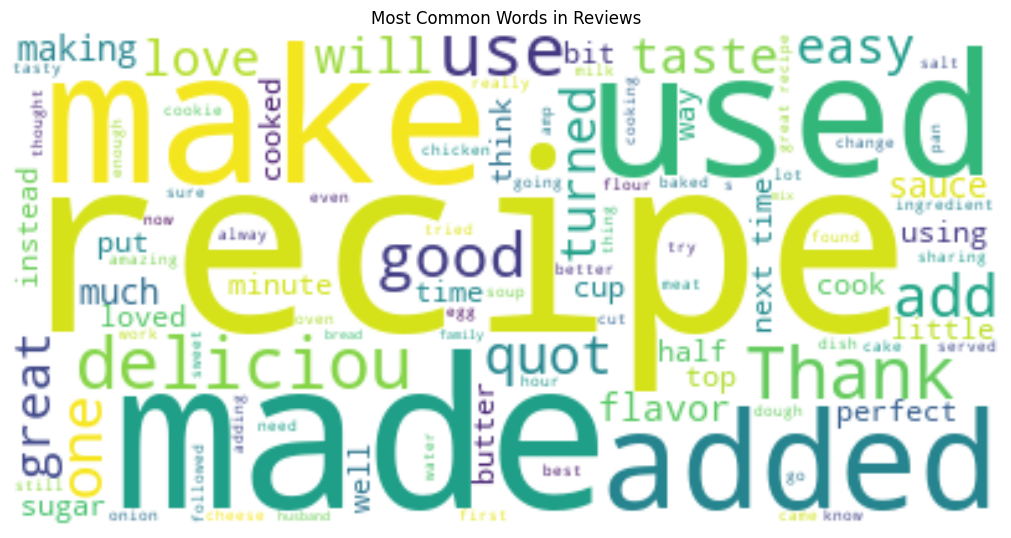

In [14]:
text = ' '.join(df["review"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most common words in ingrediants

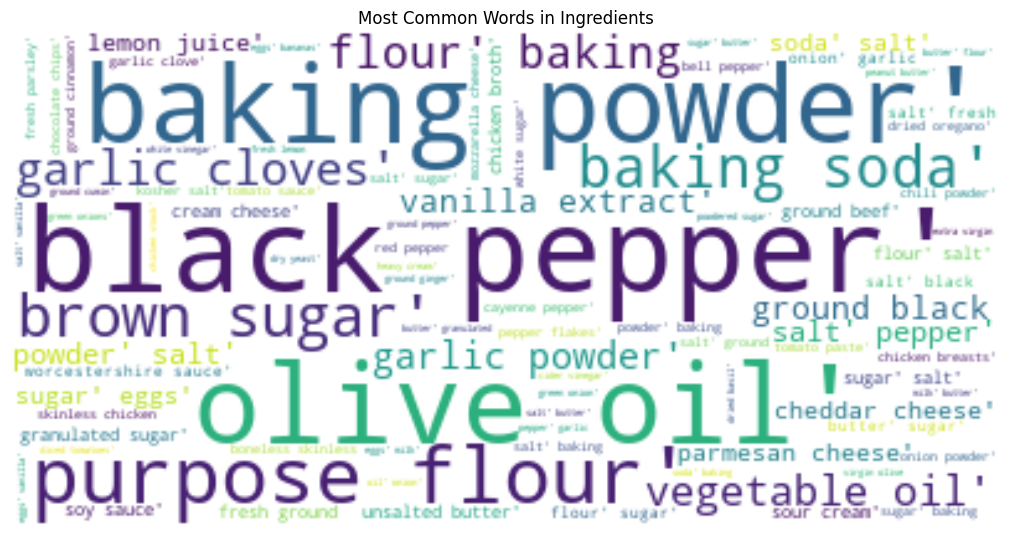

In [15]:
text = ' '.join(df["ingredients"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Ingredients")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Corelation Matrix

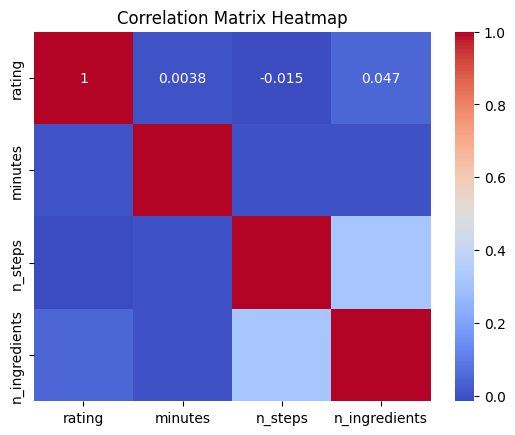

In [16]:
corr_matrix = df[["rating", "minutes", "n_steps", "n_ingredients"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Data Pre-Processing

## Split data into train & test set

In [17]:
users_with_one_rating = df["user_id"].value_counts(
)[df["user_id"].value_counts() == 1].index
df_filtered = df[~df["user_id"].isin(users_with_one_rating)]
train, test = train_test_split(
    df_filtered, test_size=0.3, random_state=777, stratify=df_filtered["user_id"])

In [18]:
train.shape, test.shape

((13652, 16), (5851, 16))

## Export train & test data

In [20]:
train.to_pickle('../data/processed/train.pkl')
test.to_pickle('../data/processed/test.pkl')